In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineRetail.csv',encoding='latin1')

In [3]:
df['Sales'] = df['Quantity']*df['UnitPrice'] 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [4]:
group_A = df[df["Country"] == "United Kingdom"]["Sales"]
group_B = df[df["Country"] == "France"]["Sales"]

In [5]:
print(f"Sample Size - Country A: {len(group_A)}, Country B: {len(group_B)}")

Sample Size - Country A: 495478, Country B: 8557


In [6]:
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

T-Statistic: -4.724
P-Value: 0.000


In [7]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Reject the null hypothesis: Significant difference in sales.


C:\Users\dhaks\AppData\Local\Temp\ipykernel_23832\4144033803.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Country", y="Sales", data=df[df['Country'].isin(['United Kingdom','France'])], estimator=np.mean, ci=95, palette="coolwarm")
C:\Users\dhaks\AppData\Local\Temp\ipykernel_23832\4144033803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Sales", data=df[df['Country'].isin(['United Kingdom','France'])], estimator=np.mean, ci=95, palette="coolwarm")


Text(0, 0.5, 'Average Sales')

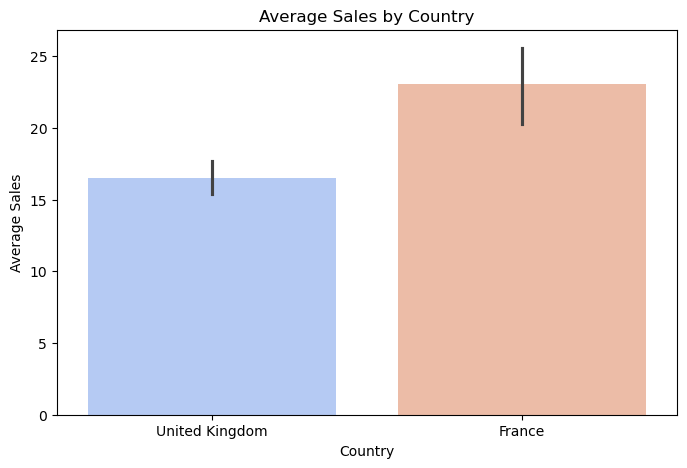

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Country", y="Sales", data=df[df['Country'].isin(['United Kingdom','France'])], estimator=np.mean, ci=95, palette="coolwarm")
plt.title("Average Sales by Country")
plt.xlabel("Country")
plt.ylabel("Average Sales")